# Exercise


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [60]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df = df.drop(["sepal length (cm)", "sepal width (cm)"], axis="columns")
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


Text(0, 0.5, 'SSE')

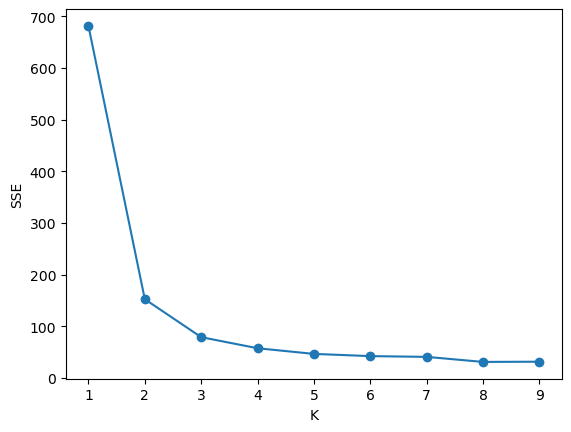

In [ ]:
k_rng = range(1, 10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(iris.data, iris.target)
    sse.append(km.inertia_)

plt.plot(k_rng, sse, marker="o")
plt.xlabel("K")
plt.ylabel("SSE")
# k = 2

In [62]:
scaler = MinMaxScaler()
scaler.fit(df[["petal width (cm)"]])
df["petal width (cm)"] = scaler.transform(df[["petal width (cm)"]])

scaler.fit(df[["petal length (cm)"]])
df["petal length (cm)"] = scaler.transform(df[["petal length (cm)"]])

df.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


In [63]:
km = KMeans(n_clusters=3)

y_predicted = km.fit_predict(df[["petal length (cm)", "petal width (cm)"]])
df["cluster"] = y_predicted
df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0


Text(0, 0.5, 'petal width (cm)')

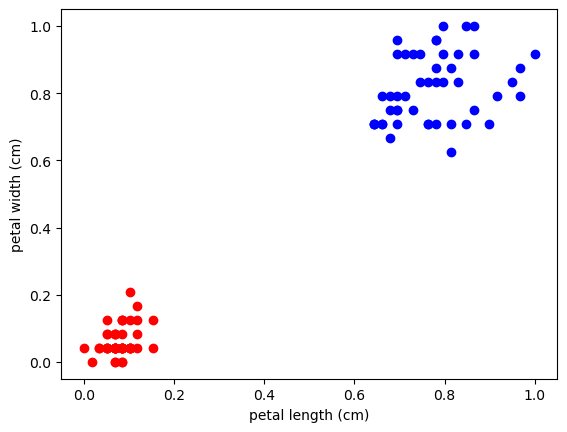

In [64]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]

plt.scatter(df1["petal length (cm)"], df1["petal width (cm)"], c="r")
plt.scatter(df2["petal length (cm)"], df2["petal width (cm)"], c="b")

plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")